### Домашнее задание №1 Ошибки и их распространение

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from math import factorial

### Задача 1

Воспользуемся разложением в ряд Тейлора функции

$func(x) = \frac{1}{1 - x} = 1 + x + x^2 + x^3 + \dots = \sum\limits_{n=0}^{\infty} x^n$ при $|x| < 1$.

При $x < 0$ этот ряд знакопеременный. Сведем его к знакопостоянному:

$\text{sc_func}(x) = \frac{1}{1 - x} = \frac{1}{2 - \frac{1 + x}{1}} = \frac{1}{2 - \frac{1}{func(-x)}}.$

In [6]:
x = -0.982
n = 100
true_val = 1 / (1 - x)

def func(x):
    res = np.float16(0)
    for k in range(n):
        res += x ** k
    return res

def sc_func(x):
    return 1 / (2 - 1 / func(-x))

print(f'Alternating sum relative error: {100 * np.abs(func(x) - true_val) / true_val:.2f}%')
print(f' Const-sign sum relative error: {100 * np.abs(sc_func(x) - true_val) / true_val:.2f}%')

Alternating sum relative error: 16.26%
 Const-sign sum relative error: 0.18%


### Задача 2

In [3]:
def stupid_sum(arr):
    summ = np.float32(0)
    
    for x in arr:
        summ += x
        
    return summ

In [4]:
def block_sum(arr, block_size):
    summ = np.float32(0)
    size = len(arr)
    blocks_num = int(size / block_size)
    
    for block_id in range(blocks_num):
        part_sum = np.float32(0)
        start_id = block_id * block_size
        
        for x in arr[start_id : start_id + block_size]:
            part_sum += x
        
        summ += part_sum
        
    if size % block_size != 0:
        part_sum = np.float32(0)
        
        for x in arr[blocks_num * block_size :]:
            part_sum += x
        
        summ += part_sum
        
    return summ

In [5]:
def tree_sum(arr):
    tree = arr.copy()
    size = len(tree)
    
    while size > 1:
        mid = int(size / 2)
        
        for i in range(mid):
            tree[i] += tree[mid + i]
            
        if size % 2 == 1:
            tree[mid] = tree[size - 1]
            
        size = int((size + 1) / 2)
        
    return tree[0]

In [6]:
def kahan_sum(arr):
    summ = np.float32(0)
    e = np.float32(0)
    
    for x in arr:
        z = summ
        y = x + e
        summ = z + y
        e = (z - summ) + y
        
    return summ

In [11]:
n = int(1e7)
vals = [1e-9, 1.0, 1e3]
arr = np.random.permutation(np.array(vals * n, dtype=np.float32))
true_summ = vals[0] * n + vals[1] * n + vals[2] * n

print('Relative error:')
print(f'Stupid summ: {100 * np.abs(stupid_sum(arr) - true_summ) / true_summ:.2f}%')
print(f' Block summ: {100 * np.abs(block_sum(arr, 3000) - true_summ) / true_summ}%')
print(f'  Tree_summ: {100 * np.abs(tree_sum(arr) - true_summ) / true_summ}%')
print(f' Kahan summ: {100 * np.abs(kahan_sum(arr) - true_summ) / true_summ}%')

Relative error:
Stupid summ: 2.14%
 Block summ: 0.00015728261738017372%
  Tree_summ: 6.393706295986438e-06%
 Kahan summ: 3.836063933773572e-06%


### Задача 3

Optimal delta: 1.0110000000000001e-05


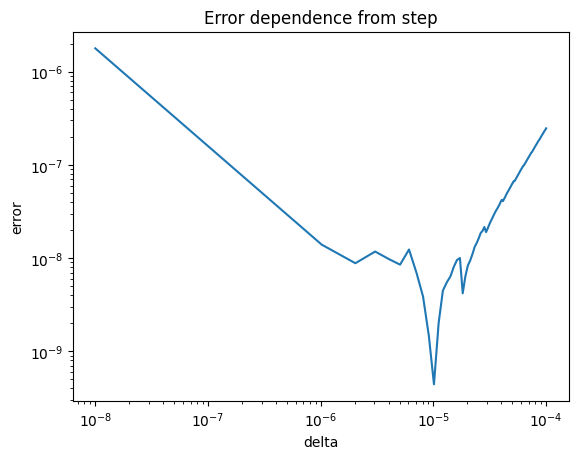

In [9]:
def first_derivative(f, x, delta):
    return (f(x + delta) - f(x - delta)) / (2 * delta)

f = lambda x: np.exp(x)
x = 5
analyt_der = np.exp(x)
deltas = np.linspace(10 ** (-8), 10 ** (-4), 100)
errors = []

for delta in deltas:
    errors.append(np.abs(first_derivative(f, x, delta) - analyt_der))

plt.plot(deltas, errors)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('delta')
plt.ylabel('error')
plt.title('Error dependence from step')
print(f'Optimal delta: {deltas[np.argmin(errors)]}')

Пусть функция $f(x)$ ограничена (локально ограничена): $|f(\xi)| < M_0$ и $|f''(\xi)| < M_2$, тогда:

$|f'(x) - \frac{f(x+h)(1 + \epsilon) - f(x-h)(1 + \epsilon)}{2h}| = |f'(x) - \frac{f(x) + hf'(x) + \frac{h^2}{2}f''(\xi_1) - f(x) + hf'(x) - \frac{h^2}{2}f''(\xi_2)}{2h} - \frac{f(x + h)\epsilon - f(x - h)\epsilon}{2h}| \leq \frac{h M_2}{2} + \frac{2 \epsilon M_0}{h}.$

Оптимальное $h$ такое, что $\frac{h M_2}{2} + \frac{2 \epsilon M_0}{h}$ минимально:

$\frac{h M_2}{2} = \frac{2 \epsilon M_0}{h} \Rightarrow h = \sqrt{\frac{4 \epsilon M_0}{M_2}}.$